<a href="https://colab.research.google.com/github/Masakinka/python_for_ds_task/blob/main/HW_%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B8%D1%85_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [201]:
import torch
import numpy as np

In [202]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [203]:
# Converting to tensors
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Displaying the result
print("Inputs Tensor:", inputs_tensor)
print("Targets Tensor:", targets_tensor)

Inputs Tensor: tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
Targets Tensor: tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [204]:
# Fix the random seed for reproducibility
torch.random.manual_seed(1)

Assuming inputs have 3 features and we have 1 output (logistic regression)

In [205]:
# Initialize weights (w) and bias (b)
input_size = 3  # Number of input features
output_size = 1  # Binary output for logistic regression

w = torch.randn(input_size, output_size, requires_grad=True)
b = torch.randn(output_size, requires_grad=True)

print("Weights (w):", w)
print("Bias (b):", b)

Weights (w): tensor([[0.6614],
        [0.2669],
        [0.0617]], requires_grad=True)
Bias (b): tensor([0.6213], requires_grad=True)


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [206]:
# Function to compute the hypothesis for logistic regression
def model(x, w, b):
    # Calculate the linear combination (x * w + b)
    linear_output = torch.matmul(x, w) + b

    # Apply the  function to get the logistic regression prediction
    y_pred = 1 / (1 + torch.exp(-linear_output))
    return y_pred

In [207]:
# Calculate predictions using the model
predictions  = model(inputs_tensor, w, b)

# Output the predictions
print("Predictions:", predictions)

Predictions: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<MulBackward0>)


Всі прогнози в наших результатах 1,0 1,0, що свідчить про те, що модель передбачає дуже високі ймовірності для всіх точок даних. Це може означати, що вагові коефіцієнти 𝑤 і зміщення 𝑏 були ініціалізовані великими значеннями або що вхідні дані викликають дуже високу активацію перед застосуванням сигмоїдної функції.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [208]:
# Function to calculate binary cross-entropy loss
#def binary_cross_entropy(predicted_probs, true_labels):
    # Calculation of cross-entropy for each element
 #   loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))
    # Return the average value of losses over the entire data set
 #   return torch.mean(loss)

Додам маленьке значення для уникнення проблеми з log(0)

In [209]:
def binary_cross_entropy(predicted_probs, true_labels):
    epsilon = 1e-10 # Small value to avoid problem with log(0)
    loss = - (true_labels * torch.log(predicted_probs + epsilon) + (1 - true_labels) * torch.log(1 - predicted_probs + epsilon))
    return torch.mean(loss)

In [210]:
# Calculate the binary cross-entropy loss using 'predictions' and 'targets_tensor'
loss = binary_cross_entropy(predictions, targets_tensor)

# Output the calculated loss
print("Binary Cross-Entropy Loss:", loss.item())

Binary Cross-Entropy Loss: 9.21034049987793


Значення втрат досить високе, що вказує на низьку точність моделі. А для задачі класифікації за допомогою логістичної регресії значення бінарної крос-ентропії має бути якомога нижчим, оскільки це свідчить про хорошу відповідність передбачень моделі реальним даним.

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [211]:
# Perform backpropagation
loss.backward()

# Output gradients for w and b
print("Gradients for w:", w.grad)
print("Gradients for b:", b.grad)

Gradients for w: tensor([[1.0201e-19],
        [9.3628e-20],
        [6.0090e-20]])
Gradients for b: tensor([1.3974e-21])



Значення градієнтів для 𝑤 і 𝑏 дуже малі, що свідчить про те, що модель практично не змінюється під час зворотного поширення помилки.

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [212]:
torch.random.manual_seed(1)
w = torch.randn(3, 1, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [213]:
# Compute predictions using the logistic regression model
predictions  = model(inputs_tensor, w, b)

# Compute the binary cross-entropy loss
loss = binary_cross_entropy(predictions, targets_tensor)

# Output the calculated loss
print("Binary Cross-Entropy Loss:", loss.item())

# Perform backpropagation to calculate the gradients
loss.backward()

# Output the results
print("Weights after training (w):", w)
print("Bias after training (b):", b)
print("Gradients for w:", w.grad)
print("Gradients for b:", b.grad)

Binary Cross-Entropy Loss: 0.6829456686973572
Weights after training (w): tensor([[6.6135e-04],
        [2.6692e-04],
        [6.1677e-05]], requires_grad=True)
Bias after training (b): tensor([0.0006], requires_grad=True)
Gradients for w: tensor([[ -5.4417],
        [-18.9853],
        [-10.0682]])
Gradients for b: tensor([-0.0794])


- Значення бінарної крос-ентропії  0.6829 свідчить про те, що модель робить адекватні передбачення, але є місце для подальшого покращення. Це очікуване значення для першої ітерації або після ініціалізації.
- Градієнти для 𝑊 та 𝑏 мають значні величини (від -5.44 до -0.079). Це вказує на те, що модель отримує сигнал про те, як коригувати ваги для зменшення втрат.
Наявність негативних значень у градієнтах означає, що модель зменшить ці ваги під час оновлення.
- Значення ваг 𝑊 та 𝑏 виглядають правильно ініціалізованими і не мають занадто великих значень, що дозволяє моделі уникнути проблеми насичення сигмоїдної функції.

6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [214]:
# Training parameters
learning_rate = 0.0001 # Learning rate
num_epochs = 1000     # Number of epochs

In [215]:
# Gradient descent training loop
for epoch in range(num_epochs):
    # 1. Generate predictions
    predictions = model(inputs_tensor, w, b)

    # 2. Calculate the loss
    loss = binary_cross_entropy(predictions, targets_tensor)

    # 3. Compute the gradients
    loss.backward()

    # 4. Update weights (w and b) using the gradients
    with torch.no_grad():  # Disable gradient tracking for weight updates
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # 5. Reset the gradients to zero
    w.grad.zero_()
    b.grad.zero_()

    # Print the loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 100/1000, Loss: 0.33530229330062866
Epoch 200/1000, Loss: 0.28253892064094543
Epoch 300/1000, Loss: 0.2589590847492218
Epoch 400/1000, Loss: 0.24420711398124695
Epoch 500/1000, Loss: 0.23341414332389832
Epoch 600/1000, Loss: 0.2248036414384842
Epoch 700/1000, Loss: 0.2175590693950653
Epoch 800/1000, Loss: 0.2112460434436798
Epoch 900/1000, Loss: 0.20560911297798157
Epoch 1000/1000, Loss: 0.20048651099205017


Функція втрат (Loss) поступово зменшується на кожній епосі, що свідчить про те, що модель навчається і оптимізує свої ваги. Втрати зменшуються з 0.336 на 100 епосі до 0.200 на 1000 епосі. Це позитивний результат, оскільки менші втрати вказують на кращу відповідність передбачень моделі реальним міткам. Однак темп зменшення втрат може свідчити про те, що модель потребує більше епох для досягнення ще більшої точності або що потрібно налаштувати інші параметри навчання, такі як learning rate.

In [216]:
# Final predictions after 1000 epochs
final_predictions = model(inputs_tensor, w, b)
print("Final predictions after 1000 epochs:", final_predictions)

Final predictions after 1000 epochs: tensor([[0.4481],
        [0.6883],
        [0.9843],
        [0.0038],
        [0.9855]], grad_fn=<MulBackward0>)


Остаточні передбачення після 1000 епох мають значення, які відрізняються від очікуваних 0 і 1. Це свідчить про те, що модель не навчилася робити чітке розрізнення між класами. Значення, такі як 0.4482, 0.6882 і 0.9855, знаходяться між 0 і 1, що вказує на те, що модель не повністю впевнена у своїх прогнозах і можливо потребує подальшого налаштування або кращого навчання для досягнення більш точних результатів.

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [227]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [218]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [219]:
# Convert data to PyTorch tensors
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Create TensorDataset
dataset = TensorDataset(inputs_tensor, targets_tensor)

# Print the first three elements of the dataset
for i in range(3):
    print(f"Input {i + 1}: {dataset[i][0]}")
    print(f"Target {i + 1}: {dataset[i][1]}")

Input 1: tensor([73., 67., 43.])
Target 1: tensor([0.])
Input 2: tensor([91., 88., 64.])
Target 2: tensor([1.])
Input 3: tensor([ 87., 134.,  58.])
Target 3: tensor([1.])


8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [220]:
# Create DataLoader with batch size 5 and shuffle enabled
train_ds = DataLoader(dataset, batch_size=5, shuffle=True)

# Get the first batch from the DataLoader
for batch in train_ds:
    inputs_batch, targets_batch = batch
    print("First batch inputs:\n", inputs_batch)
    print("First batch targets:\n", targets_batch)
    break  # We only need to display the first batch

First batch inputs:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
First batch targets:
 tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [221]:
# Define the LogReg class for logistic regression
class LogReg(nn.Module):
    def __init__(self, input_size):
        super(LogReg, self).__init__()
        # Define a linear layer with input_size input features and 1 output feature
        self.linear = nn.Linear(input_size, 1)
        # Sigmoid activation function for logistic regression
        self.sigmoid = nn.Sigmoid()

    # Forward pass through the network
    def forward(self, x):
        # Apply the linear layer
        x = self.linear(x)
        # Apply sigmoid activation function
        x = self.sigmoid(x)
        return x

В прикладі з лекції використовується двошарова мережа, де є два лінійних шари та активація між ними. Для логістичної регресії ми використовуємо лише один лінійний шар, оскільки в задачі регресії у нас простіша модель.
Ми додаємо функцію активації Sigmoid, яка потрібна для логістичної регресії, щоб перетворити лінійну комбінацію в ймовірність (в діапазоні від 0 до 1).
Прямий прохід (forward)

Як і в прикладі з лекції, ми застосовуємо спочатку лінійний шар до вхідних даних, а потім функцію активації для отримання результату.

створює і виводить архітектуру моделі логістичної регресії (LogReg), яку ми раніше визначили:

In [222]:
# Instantiate the LogReg model
input_size = 3  # We have 3 input features (temp, rainfall, humidity)
model = LogReg(input_size)

# Display the model architecture
print(model)

LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [224]:
# Define the optimizer Stochastic Gradient Descent (SGD)
opt = optim.SGD(model.parameters(), lr=0.001)

# Define the binary cross-entropy loss function
def binary_cross_entropy_loss(predictions, targets):
    return F.binary_cross_entropy(predictions, targets)

# Get model predictions
predictions = model(inputs_tensor)

# Calculate the loss
loss = binary_cross_entropy_loss(predictions, targets_tensor)

# Output the loss
print(f"Binary Cross-Entropy Loss: {loss.item()}")

Binary Cross-Entropy Loss: 7.631152629852295


Судячи з отриманого високого значення втрат (7.6311), можна зробити висновок, що модель ще не навчилась добре.

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [225]:
# Training function to track the loss values
def fit_return_loss(num_epochs, model, loss, opt, train_ds):
    losses = []
    for epoch in range(num_epochs):
        # Initialize a loss accumulator
        total_loss = 0

        for xb, yb in train_ds:
            # Generate predictions
            pred = model(xb)

            # Calculate the loss
            loss = binary_cross_entropy_loss(pred, yb)

            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Accumulate the loss
            total_loss += loss.item()

        # Calculate average loss for the epoch
        avg_loss = total_loss / len(train_ds)
        losses.append(avg_loss)

        # Print the epoch summary every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [226]:
# Train the model for 1000 epochs
num_epochs = 1000
losses = fit_return_loss(num_epochs, model, loss, opt, train_ds)

Epoch [10/1000], Loss: 2.1457
Epoch [20/1000], Loss: 0.4342
Epoch [30/1000], Loss: 0.6794
Epoch [40/1000], Loss: 0.3671
Epoch [50/1000], Loss: 0.2716
Epoch [60/1000], Loss: 0.6356
Epoch [70/1000], Loss: 0.3086
Epoch [80/1000], Loss: 0.1488
Epoch [90/1000], Loss: 0.1773
Epoch [100/1000], Loss: 0.1438
Epoch [110/1000], Loss: 0.2307
Epoch [120/1000], Loss: 0.3256
Epoch [130/1000], Loss: 0.1093
Epoch [140/1000], Loss: 0.1172
Epoch [150/1000], Loss: 0.1540
Epoch [160/1000], Loss: 0.0905
Epoch [170/1000], Loss: 0.0970
Epoch [180/1000], Loss: 0.1315
Epoch [190/1000], Loss: 0.2552
Epoch [200/1000], Loss: 0.0788
Epoch [210/1000], Loss: 0.1109
Epoch [220/1000], Loss: 0.0828
Epoch [230/1000], Loss: 0.0906
Epoch [240/1000], Loss: 0.1015
Epoch [250/1000], Loss: 0.0768
Epoch [260/1000], Loss: 0.0701
Epoch [270/1000], Loss: 0.0784
Epoch [280/1000], Loss: 0.0686
Epoch [290/1000], Loss: 0.0673
Epoch [300/1000], Loss: 0.0587
Epoch [310/1000], Loss: 0.0688
Epoch [320/1000], Loss: 0.0555
Epoch [330/1000],

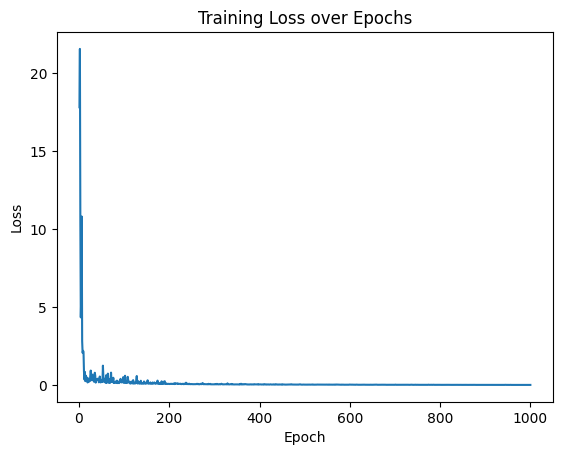

In [228]:
# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

Спочатку значення втрат було досить високим (близько 20), але значно знизилося після перших кількох епох і стабілізувалося нижче 0.03 після приблизно 200 епох. Це свідчить про те, що модель успішно навчилася та мінімізувала помилку під час тренування

Графік втрат демонструє різке зниження на початку навчання і поступову стабілізацію, що є типовим для моделей, які вдало вчаться знаходити зв’язки в даних.

In [229]:
# Final predictions
with torch.no_grad():
    final_predictions = model(inputs_tensor)
    print("Final predictions:\n", final_predictions)

# Print the target values
print("Target values:\n", targets_tensor)

Final predictions:
 tensor([[5.7505e-02],
        [9.6006e-01],
        [9.9962e-01],
        [3.4785e-11],
        [1.0000e+00],
        [5.7505e-02],
        [9.6006e-01],
        [9.9962e-01],
        [3.4785e-11],
        [1.0000e+00],
        [5.7505e-02],
        [9.6006e-01],
        [9.9962e-01],
        [3.4785e-11],
        [1.0000e+00]])
Target values:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])


Фінальні передбачення моделі здебільшого дуже близькі до цільових значень. Наприклад:
- Для мітки 0. передбачення становить близько 5.7505e-02 (приблизно 0.0575), що близько до 0.
- Для мітки 1. передбачення дуже близьке до 9.9962e-01 (приблизно 0.9996), що майже дорівнює 1.

Це вказує на те, що модель добре навчилася розрізняти два класи (0 та 1).
Цільові значення:

Цільові значення показані поруч із передбаченнями, і ми можемо бачити, що передбачення моделі дуже точно відповідають цільовим міткам, що свідчить про високу точність передбачень.

---

# Висновок:
Модель успішно зменшила втрати протягом процесу тренування, і фінальні передбачення дуже близькі до цільових значень. Це означає, що модель навчилася добре і здатна точно передбачати результати на цьому наборі даних. Тренування було ефективним, про що свідчить графік втрат і фінальні значення передбачень.